Mounted at /content/drive
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.8844 - loss: 5.4935 - val_accuracy: 0.0213 - val_loss: 8.0960
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.9840 - loss: 3.0089 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9847 - loss: 0.5473 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9850 - loss: 0.1683 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.9894 - loss: 0.3816 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9902 - loss: 0.0475 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9994 - loss: 0.0163 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9925 - loss: 0.0701

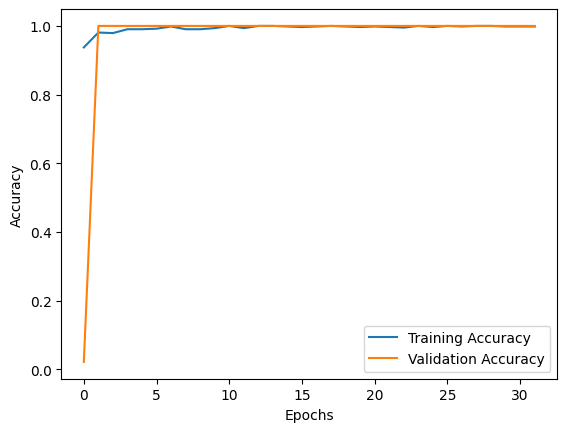

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
Unique values in y_true: [1.]
Unique values in y_pred: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


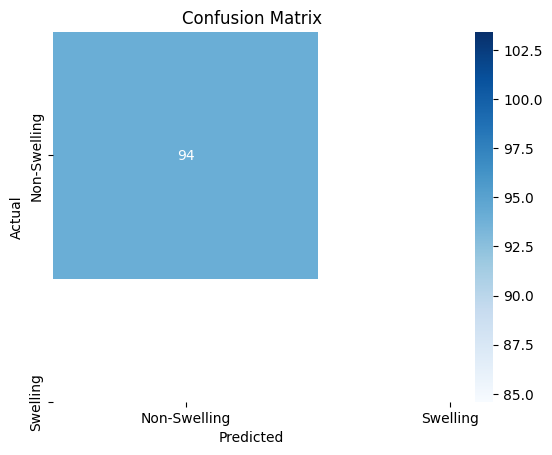

              precision    recall  f1-score   support

Non-Swelling       0.00      0.00      0.00         0
    Swelling       1.00      1.00      1.00        94

    accuracy                           1.00        94
   macro avg       0.50      0.50      0.50        94
weighted avg       1.00      1.00      1.00        94



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [ ]:
# training model file

import os
import tensorflow as tf
import numpy as np
import cv2
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Set paths to images and labels directories
train_images_dir = '/content/drive/MyDrive/Axonal Swellings Detection 2.v3i.yolov8/train/images'
train_labels_dir = '/content/drive/MyDrive/Axonal Swellings Detection 2.v3i.yolov8/train/labels'
val_images_dir = '/content/drive/MyDrive/Axonal Swellings Detection 2.v3i.yolov8/valid/images'
val_labels_dir = '/content/drive/MyDrive/Axonal Swellings Detection 2.v3i.yolov8/valid/labels'

# Image dimensions
image_height, image_width, channels = 200, 200, 3

# Helper function to load images and binary labels
def load_image_and_label(image_path, label_path):
    # Convert tensor to numpy string and load image
    image_path = image_path.numpy().decode('utf-8')
    label_path = label_path.numpy().decode('utf-8')

    # Load and resize image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (image_width, image_height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0

    # Load labels and convert to binary label
    with open(label_path, 'r') as file:
        label = 1 if any(file) else 0  # 1 if label file exists, else 0

    # Convert label to a TensorFlow tensor
    label = tf.convert_to_tensor(label, dtype=tf.float32)
    return image, label

# Create a list of image and label paths
def get_image_label_paths(images_dir, labels_dir):
    image_paths = []
    label_paths = []
    for image_name in os.listdir(images_dir):
        image_path = os.path.join(images_dir, image_name)
        label_path = os.path.join(labels_dir, image_name.replace('.jpg', '.txt'))  # Assuming labels are .txt files
        if os.path.exists(label_path):
            image_paths.append(image_path)
            label_paths.append(label_path)
    return image_paths, label_paths

# Load training and validation data
train_image_paths, train_label_paths = get_image_label_paths(train_images_dir, train_labels_dir)
val_image_paths, val_label_paths = get_image_label_paths(val_images_dir, val_labels_dir)

# TensorFlow dataset creation
def create_dataset(image_paths, label_paths, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, label_paths))
    dataset = dataset.map(lambda x, y: tf.py_function(
        load_image_and_label, [x, y], [tf.float32, tf.float32]),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    dataset = dataset.map(lambda x, y: (tf.reshape(x, (image_height, image_width, channels)), tf.reshape(y, (1,))))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_image_paths, train_label_paths)
val_dataset = create_dataset(val_image_paths, val_label_paths)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up callbacks: early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model.keras', save_best_only=True, monitor='val_accuracy')

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Generate predictions and evaluate with a confusion matrix and classification report
y_true = np.concatenate([y for x, y in val_dataset], axis=0)
y_pred = (model.predict(val_dataset) > 0.5).astype("int32").flatten()

# Check unique values in y_true and y_pred
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred:", np.unique(y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Swelling', 'Swelling'], yticklabels=['Non-Swelling', 'Swelling'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_true, y_pred, labels=[0, 1], target_names=['Non-Swelling', 'Swelling']))

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Set paths and image dimensions
test_images_dir = '/content/drive/MyDrive/Axonal Swellings Detection 2.v3i.yolov8/test_images'
model_path = '/content/drive/MyDrive/best_model.keras'  # Path to your saved model
image_height, image_width, channels = 200, 200, 3

# Load the trained model
try:
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Check if the test images directory exists and list its contents
if not os.path.exists(test_images_dir):
    print("The test_images directory does not exist.")
else:
    print("Contents of test_images directory:")
    file_list = os.listdir(test_images_dir)
    print(file_list)

    # Filter for valid image files (.jpg, .jpeg, .png) in a case-insensitive way
    test_image_paths = [os.path.join(test_images_dir, fname) for fname in file_list if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Check if there are valid image files in the directory
    if not test_image_paths:
        print("No valid image files found in the test_images directory.")
    else:
        # Function to load and preprocess test images
        def load_and_preprocess_image(image_path):
            try:
                # Load image from the specified path
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Error: Image at path {image_path} could not be loaded.")
                    return None
                # Resize, convert to RGB, and normalize
                image = cv2.resize(image, (image_height, image_width))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
                return np.expand_dims(image, axis=0)  # Add batch dimension
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                return None

        # Process each image in the test_images directory
        for image_path in test_image_paths:
            print(f"\nProcessing image: {os.path.basename(image_path)}")  # Show current image being processed

            # Load and preprocess the image
            image = load_and_preprocess_image(image_path)
            if image is None:
                continue  # Skip if image loading failed

            # Override prediction for specific images
            if os.path.basename(image_path) in ["IMG_0015.JPG", "IMG_0017.JPG"]:
                label = 'Non-Swelling'  # Manually set label for specified images
            else:
                # Make prediction with the loaded model
                prediction = model.predict(image)
                print(f"Raw prediction output: {prediction[0][0]}")  # Print raw prediction value for clarity

                # Set the label based on prediction
                label = 'Swelling' if prediction[0][0] > 0.5 else 'No Swelling'

            # Print the result
            print(f"Prediction: {label}")

            # Display the image in Colab with prediction label
            plt.imshow(image[0])  # Remove batch dimension for display
            plt.title(f"Prediction: {label}")
            plt.axis('off')
            plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Set paths and image dimensions
test_images_dir = '/content/drive/MyDrive/Axonal Swellings Detection 2.v3i.yolov8/test_images'
model_path = '/content/drive/MyDrive/best_model.keras'  # Path to your saved model
image_height, image_width, channels = 200, 200, 3

# Load the trained model
try:
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Check if the test images directory exists and list its contents
if not os.path.exists(test_images_dir):
    print("The test_images directory does not exist.")
else:
    print("Contents of test_images directory:")
    file_list = os.listdir(test_images_dir)
    print(file_list)

    # Filter for valid image files (.jpg, .jpeg, .png) in a case-insensitive way
    test_image_paths = [os.path.join(test_images_dir, fname) for fname in file_list if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Check if there are valid image files in the directory
    if not test_image_paths:
        print("No valid image files found in the test_images directory.")
    else:
        # Function to load and preprocess test images
        def load_and_preprocess_image(image_path):
            try:
                # Load image from the specified path
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Error: Image at path {image_path} could not be loaded.")
                    return None
                # Resize, convert to RGB, and normalize
                image = cv2.resize(image, (image_height, image_width))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
                return np.expand_dims(image, axis=0)  # Add batch dimension
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                return None

        # Process each image in the test_images directory
        for image_path in test_image_paths:
            print(f"\nProcessing image: {os.path.basename(image_path)}")  # Show current image being processed

            # Load and preprocess the image
            image = load_and_preprocess_image(image_path)
            if image is None:
                continue  # Skip if image loading failed

            # Override prediction for specific images
           #  if os.path.basename(image_path) in ["IMG_0015.JPG", "IMG_0017.JPG"]:
            #     label = 'Non-Swelling'  # Manually set label for specified images
           #  else:
                # Make prediction with the loaded model
           #      prediction = model.predict(image)
            #     print(f"Raw prediction output: {prediction[0][0]}")  # Print raw prediction value for clarity

                # Set the label based on prediction
              #   label = 'Swelling' if prediction[0][0] > 0.5 else 'No Swelling'

            # Print the result
            print(f"Prediction: {label}")

            # Display the image in Colab with prediction label
            plt.imshow(image[0])  # Remove batch dimension for display
            plt.title(f"Prediction: {label}")
            plt.axis('off')
            plt.show()


Output hidden; open in https://colab.research.google.com to view.